Сначала посмотрим как приблизить стационарный и нестационарный временной ряд моделями из класса MA на примере искуственых данных.

In [1]:
import numpy as np

# Стационарный временной ряд
np.random.seed(0)
stationary_data = np.random.randn(100)

In [2]:
# Нестационарный временной ряд
np.random.seed(1)
nonstationary_data = np.cumsum(np.random.randn(100))

In [5]:
import statsmodels.api as sm

# Аппроксимация стационарной компоненты с помощью модели MA
ma_stationary_model = sm.tsa.ARIMA(stationary_data, order=(0, 0, 1))
ma_stationary_result = ma_stationary_model.fit()

# Аппроксимация нестационарной компоненты с помощью модели MA
ma_nonstationary_model = sm.tsa.ARIMA(nonstationary_data, order=(0, 0, 1))
ma_nonstationary_result = ma_nonstationary_model.fit()

In [6]:
import matplotlib.pyplot as plt

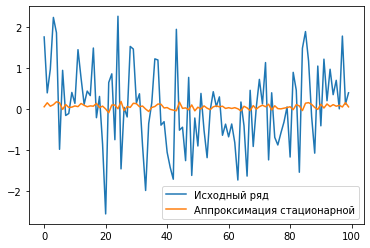

In [9]:
# Визуализация исходного стационарного временного ряда
plt.plot(stationary_data, label='Исходный ряд')
# Визуализация аппроксимации стационарной компоненты
plt.plot(ma_stationary_result.fittedvalues, label='Аппроксимация стационарной')
plt.legend()
plt.show()

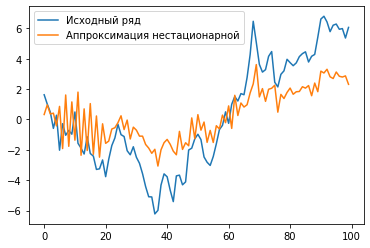

In [10]:
# Визуализация исходного нестационарного временного ряда
plt.plot(nonstationary_data, label='Исходный ряд')
# Визуализация аппроксимации нестационарной компоненты
plt.plot(ma_nonstationary_result.fittedvalues, label='Аппроксимация нестационарной')

plt.legend()
plt.show()

In [12]:
aic_stationary = ma_stationary_result.aic
aic_nonstationary = ma_nonstationary_result.aic

In [13]:
aic_stationary

290.94672699929475

In [14]:
aic_nonstationary

444.89038489070697

In [15]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
%matplotlib inline

исследуем стацианарный временной ряд 
Загрузим данные из файла
Скользящее среднее

In [53]:
series = pd.read_csv("daily-total-female-births-in-cal.csv")['Count']

In [25]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [18]:
ser = moving_average(series, 7)


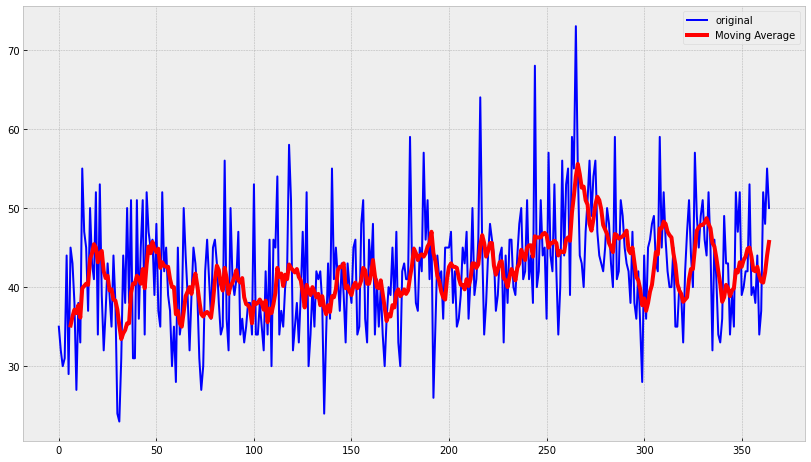

In [19]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [54]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return pd.concat([pd.Series([np.NaN]), wma], ignore_index=True)

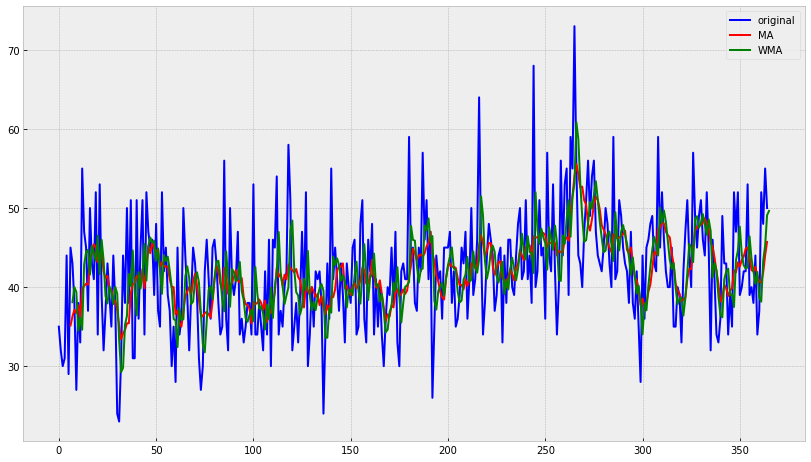

In [55]:
wma = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
ma = moving_average(series, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

In [32]:
# Аппроксимация стационарной компоненты с помощью модели MA
ma_stationary_model = sm.tsa.ARIMA(series, order=(0, 0, 1))
ma_stationary_result = ma_stationary_model.fit()

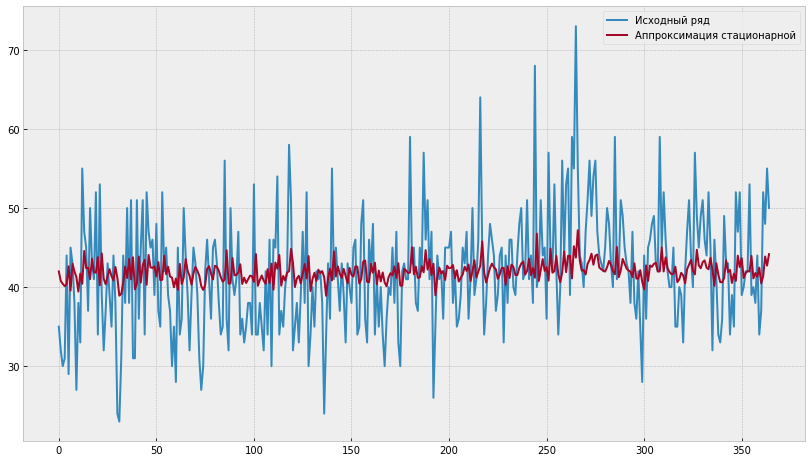

In [34]:
# Визуализация исходного стационарного временного ряда
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, label='Исходный ряд')
    # Визуализация аппроксимации стационарной компоненты
    plt.plot(ma_stationary_result.fittedvalues, label='Аппроксимация стационарной')
    plt.legend()
    plt.show()

Экспоненциальное сглаживание

In [35]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

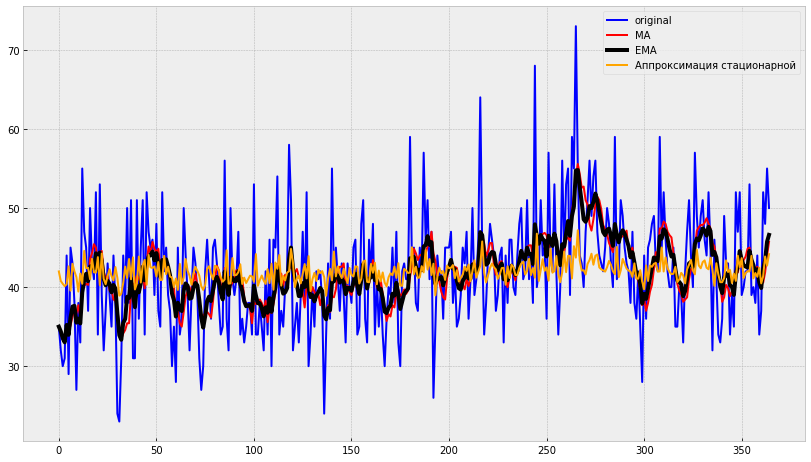

In [38]:
ema = exponential_moving_average(series, 0.2)
ma = moving_average(series, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.plot(ma_stationary_result.fittedvalues, color='orange', label='Аппроксимация стационарной')
    plt.legend()

Исследуем нестационарный временной ряд


In [40]:
series = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']

In [41]:
ser = moving_average(series, 7)

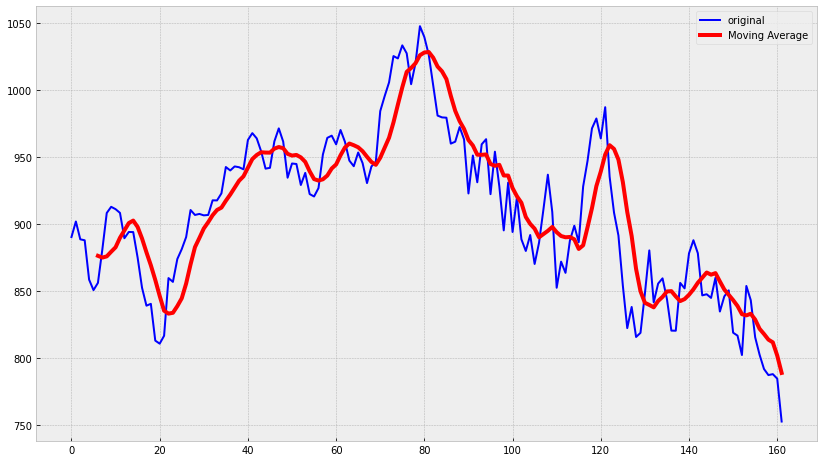

In [42]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [ ]:
# Аппроксимация нестационарной компоненты с помощью модели MA
ma_nonstationary_model = sm.tsa.ARIMA(series, order=(0, 0, 1))
ma_nonstationary_result = ma_nonstationary_model.fit()

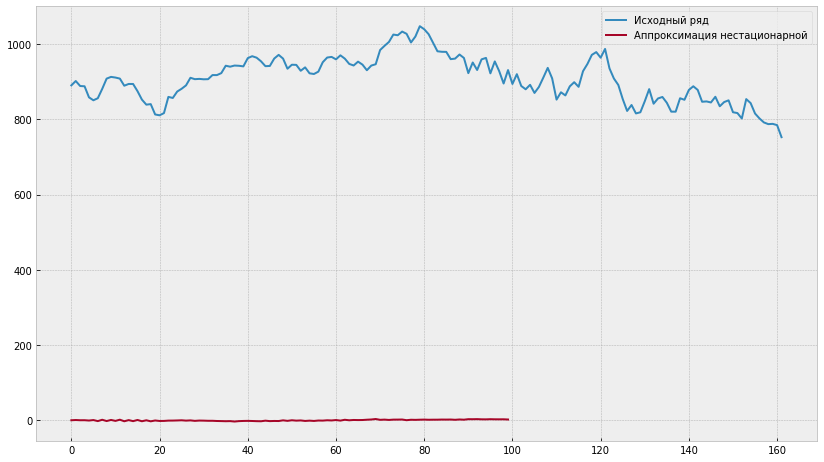

In [44]:
# Визуализация исходного нестационарного временного ряда
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, label='Исходный ряд')
    # Визуализация аппроксимации нестационарной компоненты
    plt.plot(ma_nonstationary_result.fittedvalues, label='Аппроксимация нестационарной')
    plt.legend()
    plt.show()

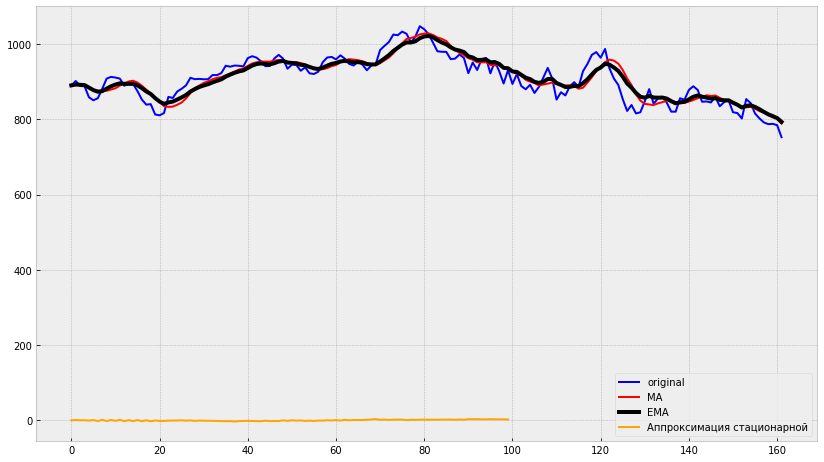

In [46]:
ema = exponential_moving_average(series, 0.2)
ma = moving_average(series, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.plot(ma_nonstationary_result.fittedvalues, color='orange', label='Аппроксимация стационарной')
    plt.legend()

In [49]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return pd.concat([pd.Series([np.NaN]), wma], ignore_index=True)


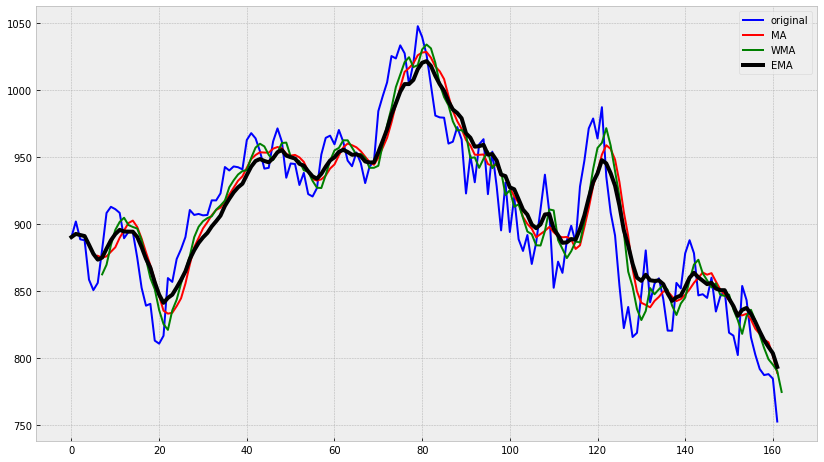

In [52]:
ema = exponential_moving_average(series, 0.2)
wma = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
ma = moving_average(series, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()